In [1]:
import tensorflow as tf
# Josh Gordon credits:https://github.com/random-forests/tutorials/blob/master/ep7.ipynb

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [6]:
#train and test data
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [5]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

784


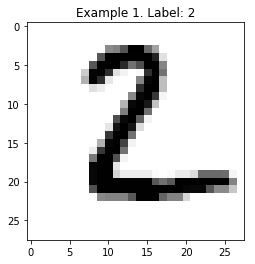

In [11]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)
display(1)
print len(data[0])

In [15]:
#linear Classifier

feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)


classifier.evaluate(test_data, test_labels)
print classifier.evaluate(test_data, test_labels)["accuracy"]


0.9216


In [17]:
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)


InvalidArgumentError: tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]

Caused by op u'save/RestoreV2_1', defined at:
  File "/Users/dny/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/dny/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/dny/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/dny/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-ab223fd45ad2>", line 1, in <module>
    print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 381, in new_func
    return func(*args, **kwargs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 381, in new_func
    return func(*args, **kwargs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 528, in predict
    as_iterable=as_iterable)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 381, in new_func
    return func(*args, **kwargs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 563, in predict_classes
    as_iterable=as_iterable)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/util/deprecation.py", line 316, in new_func
    return func(*args, **kwargs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 615, in predict
    as_iterable=as_iterable)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 919, in _infer_model
    config=self._session_config))
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py", line 673, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py", line 493, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py", line 851, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py", line 856, in _create_session
    return self._sess_creator.create_session()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py", line 554, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py", line 419, in create_session
    self._scaffold.finalize()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/monitored_session.py", line 210, in finalize
    self._saver = training_saver._get_saver_or_default()  # pylint: disable=protected-access
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 807, in _get_saver_or_default
    saver = Saver(sharded=True, allow_empty=True)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 745, in _build_internal
    restore_sequentially, reshape)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 470, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1021, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/dny/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]
